In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"surabhigovil","key":"4b4a01fbc79aa74ee86dab961f0653f5"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

Gaussian Filtered Retina Images Dataset: https://www.kaggle.com/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

In [4]:
! kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

100% 426M/427M [00:06<00:00, 58.2MB/s]
100% 427M/427M [00:06<00:00, 66.7MB/s]


In [8]:
import zipfile
from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [ ]:
! unzip diabetic-retinopathy-224x224-gaussian-filtered.zip -d gaussian_images_dataset

In [10]:
train = pd.read_csv("/content/gaussian_images_dataset/train.csv")
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


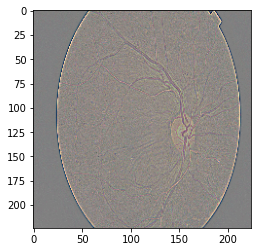

In [22]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
testim = mpimg.imread('/content/gaussian_images_dataset/gaussian_filtered_images/gaussian_filtered_images/Severe/c3a82acb7d7a.png')
imshow(testim)

In [26]:
import cv2
import numpy as np
import glob  # for read file from folder
import time  # for estimate processing time(optional)

In [51]:
# load image in gray scale
image_query = cv2.imread('/content/gaussian_images_dataset/gaussian_filtered_images/gaussian_filtered_images/Severe/c3a82acb7d7a.png', cv2.IMREAD_GRAYSCALE)
train_image_list = cv2.imread('/content/gaussian_images_dataset/gaussian_filtered_images/gaussian_filtered_images/No_DR/e66ad813a508.png', cv2.IMREAD_GRAYSCALE)

In [52]:
print(train_image_list.shape)

(224, 224)


In [53]:
# create ORB dectector
orb = cv2.ORB_create(nfeatures=2000)  # default features is 500

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(train_image_list,None)
kp2, des2 = orb.detectAndCompute(image_query,None)

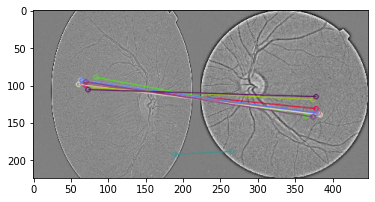

(<matplotlib.image.AxesImage at 0x7fb0d1d5fb70>, None)

In [55]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(image_query,kp1,train_image_list,kp2,matches[:10],None,flags=2)

plt.imshow(img3),plt.show()